# Time Series - Motif Discovery

## covid19_pt.csv
Daily death reports from covid in the year of 2020

### Imports

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ts_functions as ts

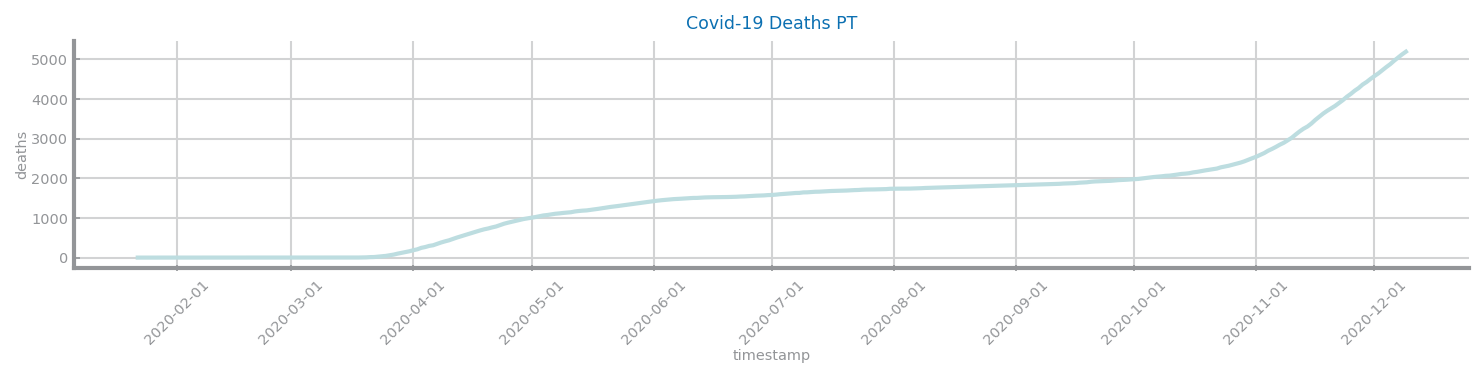

In [20]:
data = pd.read_csv('covid19_pt.csv', index_col='Date', sep=',', decimal='.',
                   parse_dates=True, infer_datetime_format=True)

data = pd.read_csv('covid19_pt.csv')
data = data.sort_values(by=["Date"]) #Dates weren't sorted

index_var = 'Date'
variable = 'deaths'
data[index_var] = pd.to_datetime(data[index_var])
data = data.set_index(index_var).sort_index()

FIG_WIDTH, FIG_HEIGHT = 3*ts.HEIGHT, ts.HEIGHT/2

plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
ts.plot_series(data, x_label='timestamp', y_label='deaths', title='Covid-19 Deaths PT')
plt.xticks(rotation = 45)
plt.show()

### Matrix Profile

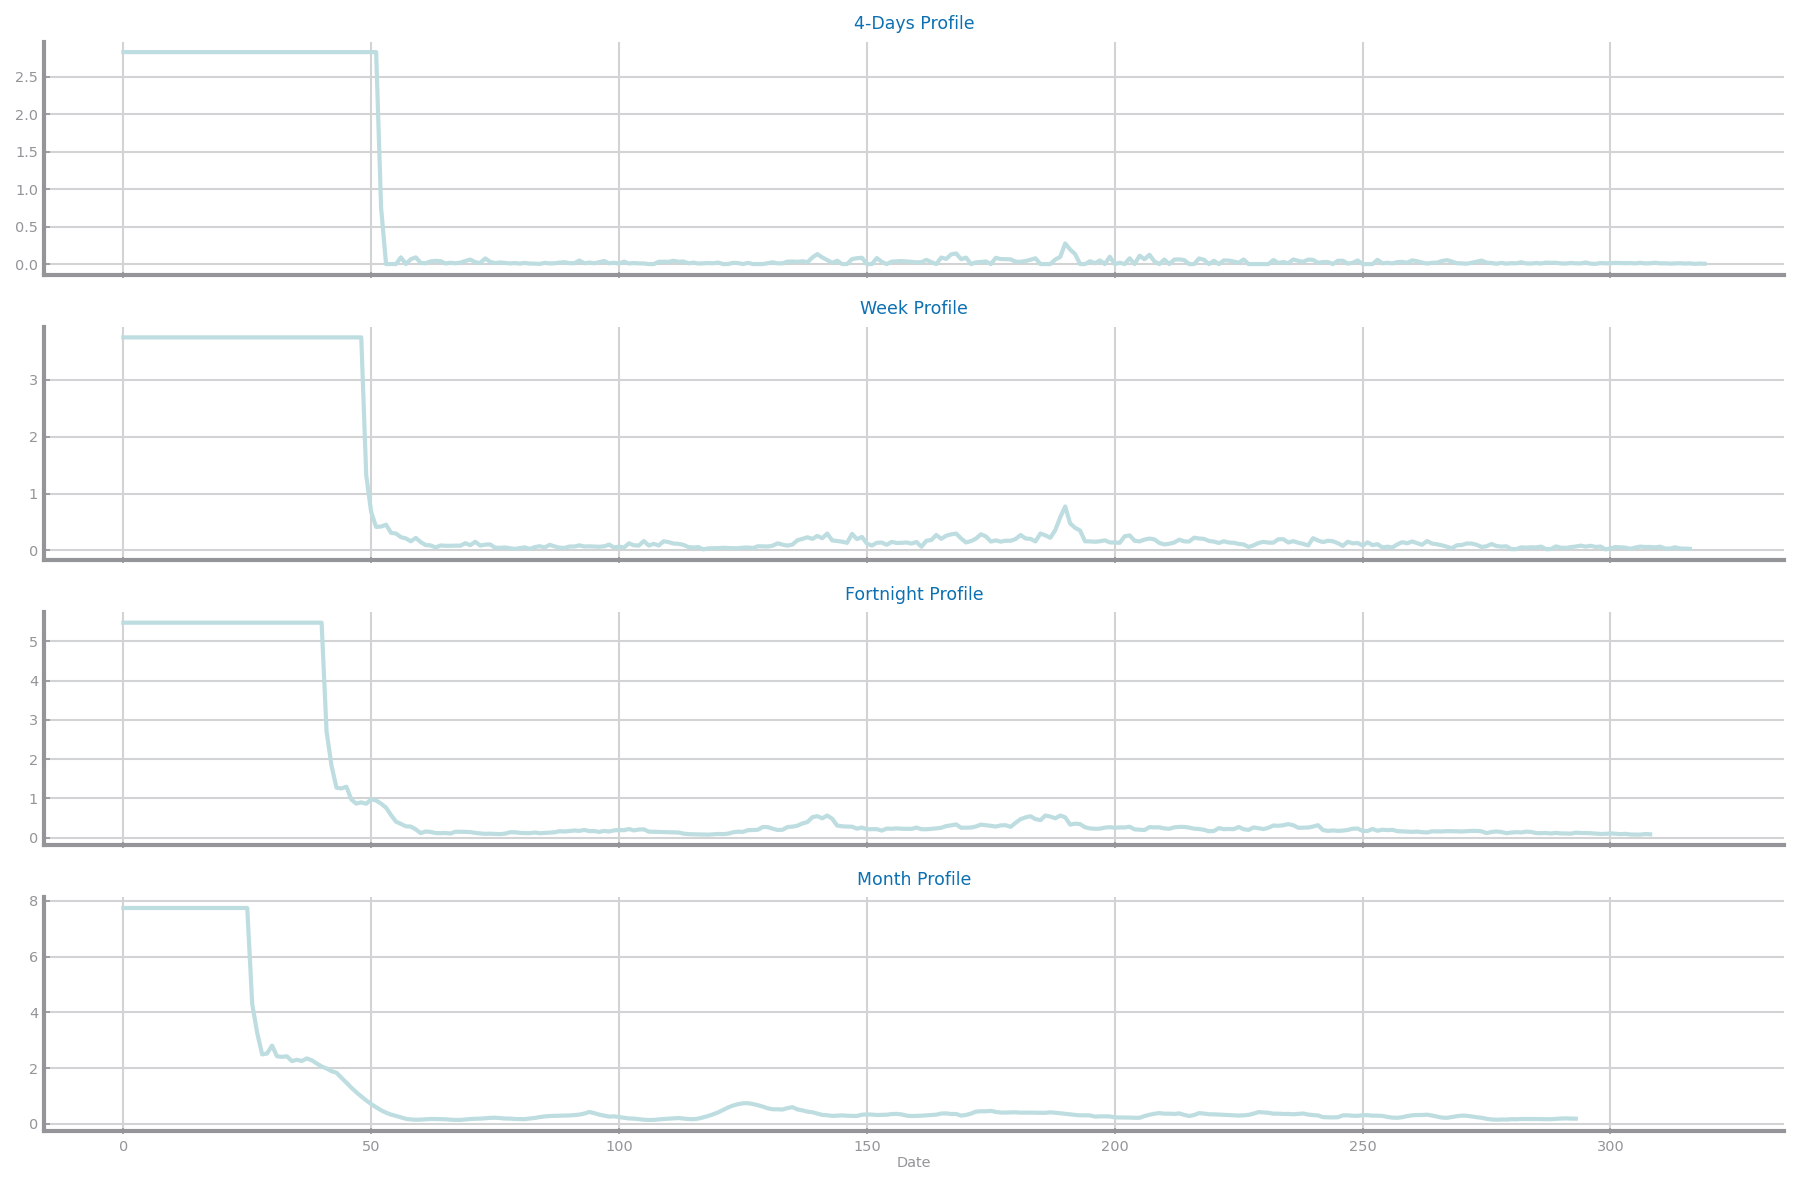

In [31]:
import matrixprofile as mp

all_windows = [
    ('4-Days', 4),
    ('Week', 7),
    ('Fortnight', 15),
    ('Month', 30),
    ('Quarter', 3 * 30)
]

def compute_matrix_profiles(df: pd.DataFrame, windows: list) :
    profiles = {}
    for label, size in windows:
        key = '{} Profile'.format(label)
        profiles[key] = mp.compute(df[variable].values, size)
    return profiles

def plot_signal_data(profiles: dict, windows: list):
    _, axes = plt.subplots(len(windows), 1, sharex=True, figsize=(FIG_WIDTH, len(windows)*FIG_HEIGHT))
    for ax_idx, window in enumerate(windows):
        key = '{} Profile'.format(window[0])
        axes[ax_idx].plot(profiles[key]['mp'])
        axes[ax_idx].set_title(key)

    plt.xlabel(index_var)
    plt.tight_layout()
    plt.show()

all_profiles = compute_matrix_profiles(data, all_windows)
plot_signal_data(all_profiles, all_windows)

### Motifs

In [34]:
def compute_all_profiles(profiles: dict, windows: list, k: int, type: str='motifs'):
    discover_function = mp.discover.motifs
    if type == 'discords':
        discover_function = mp.discover.discords

    for label, size in windows:
        key = '{} Profile'.format(label)
        profiles[key] = discover_function(profiles[key], k=k, exclusion_zone=2*size//3)

compute_all_profiles(all_profiles, all_windows, k=10, type='motifs')

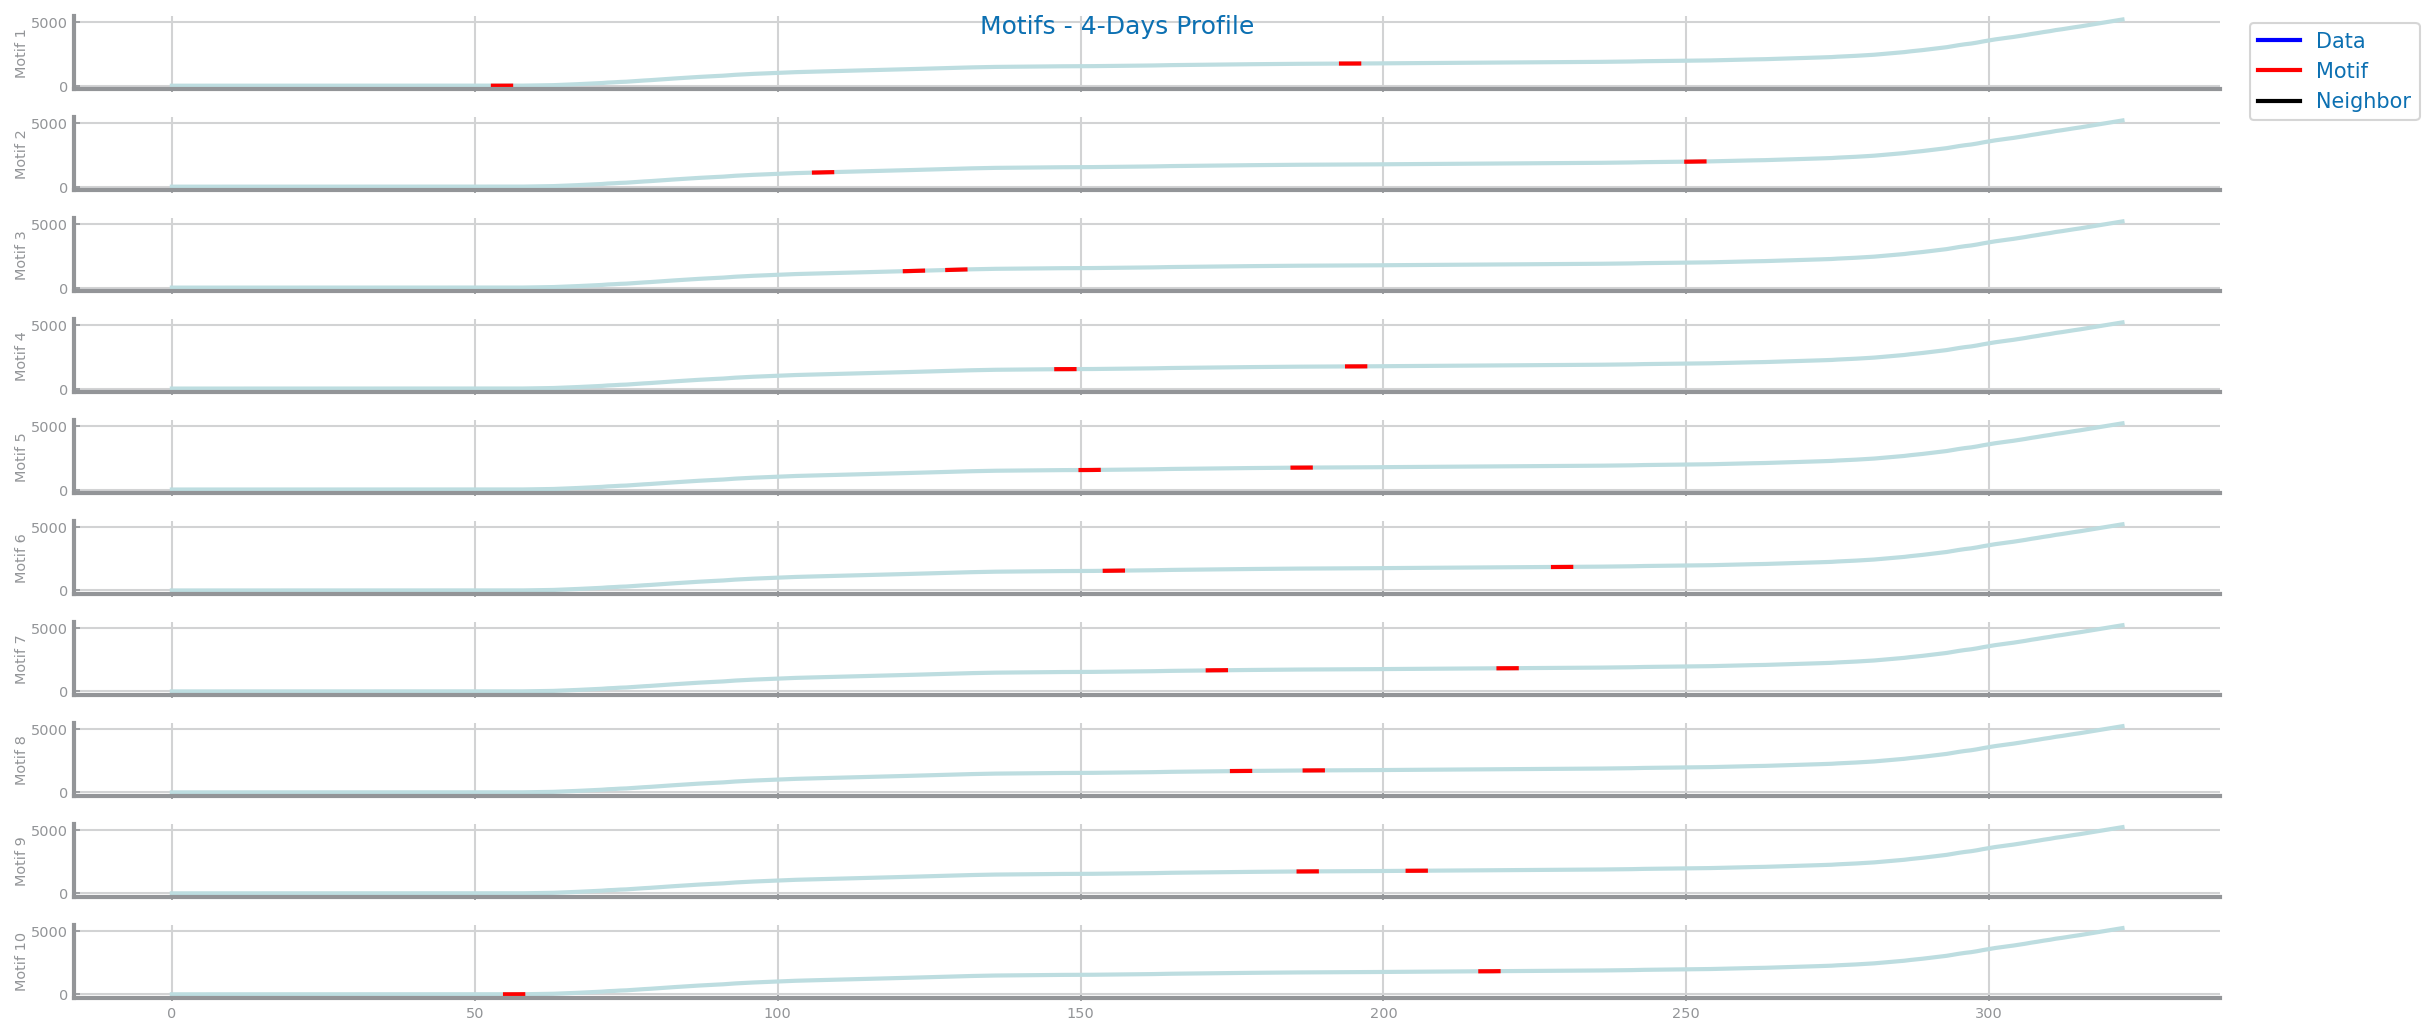

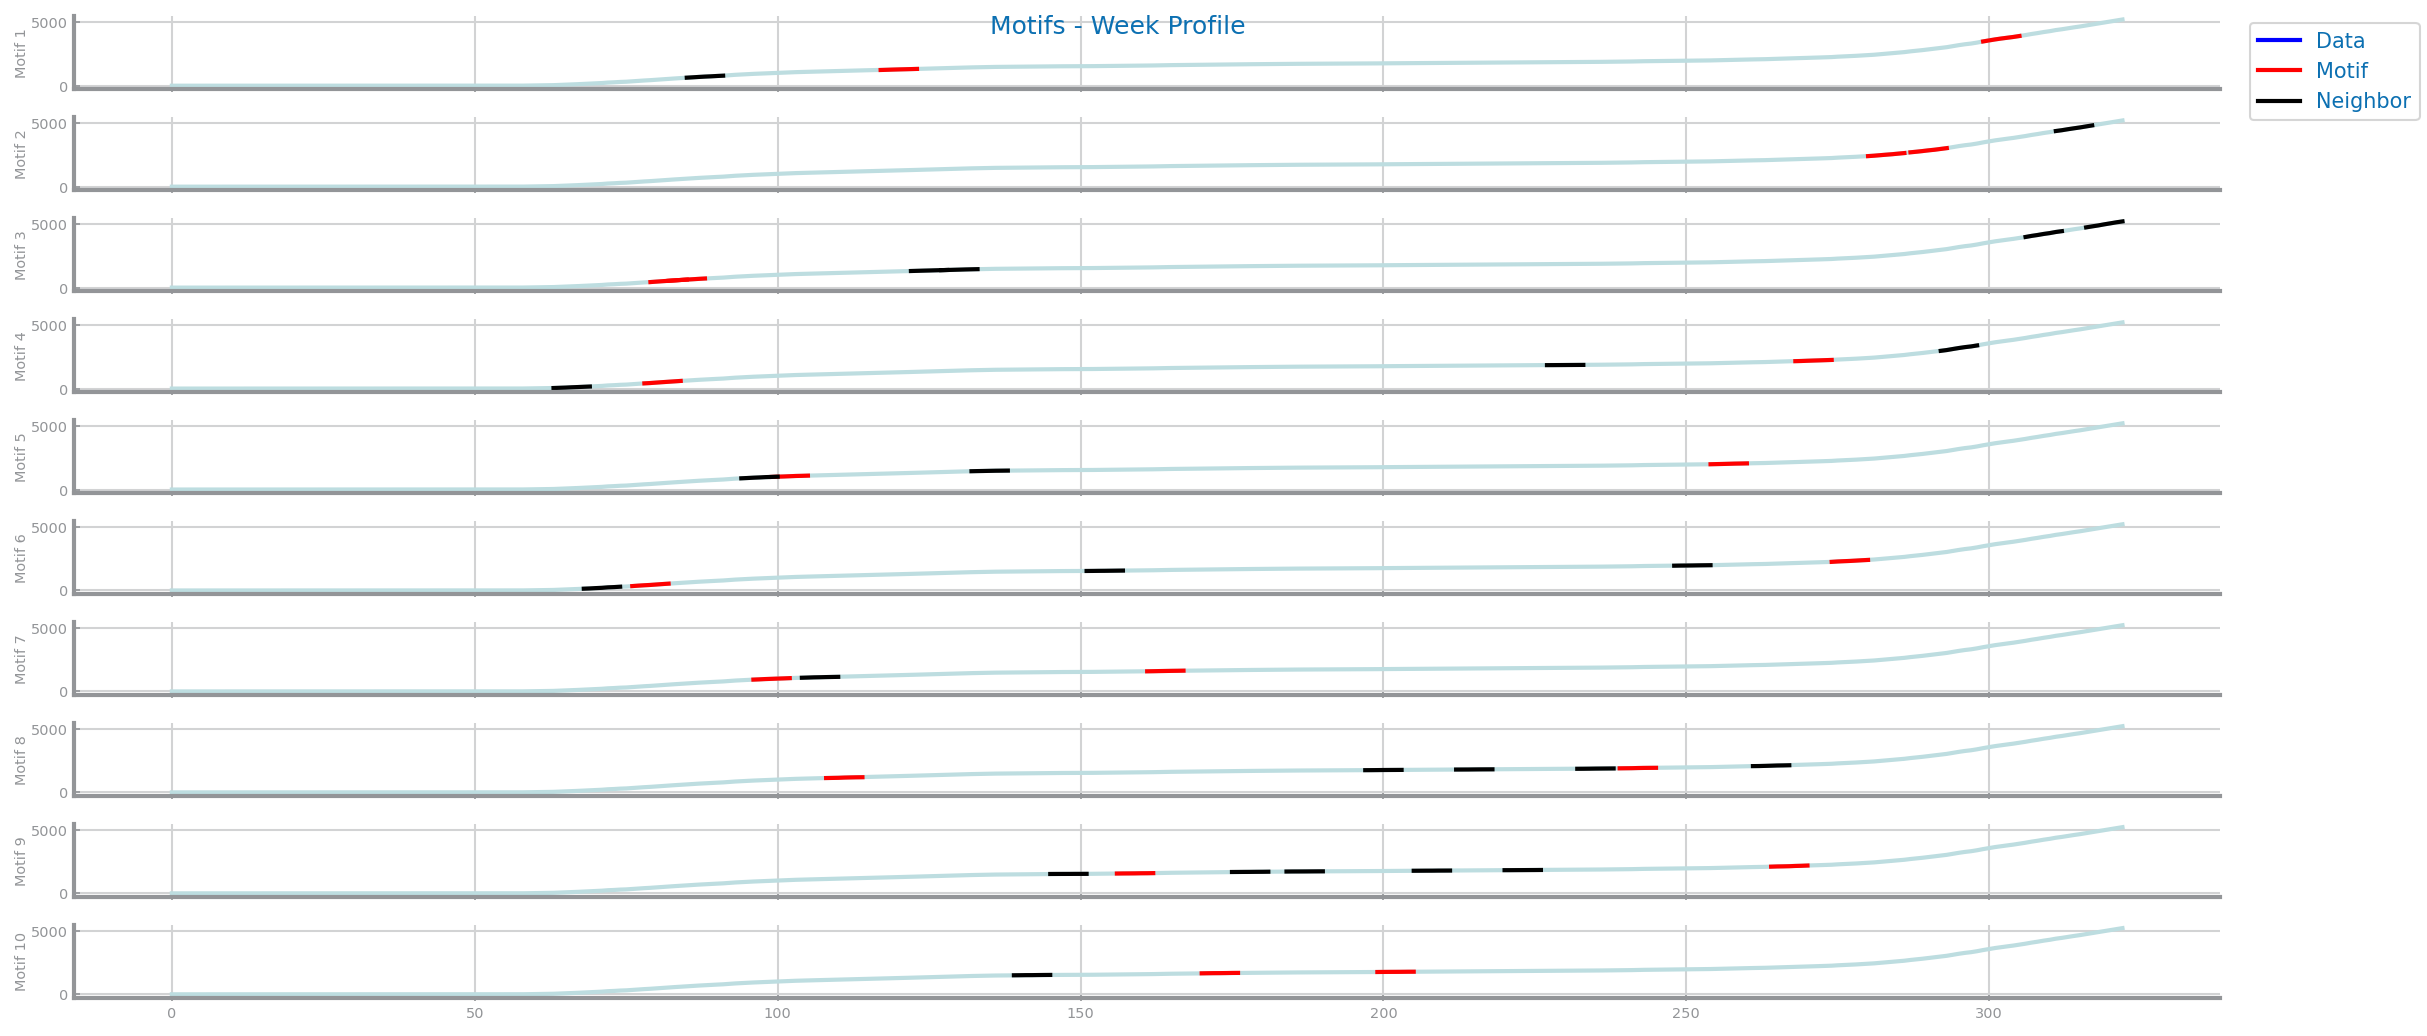

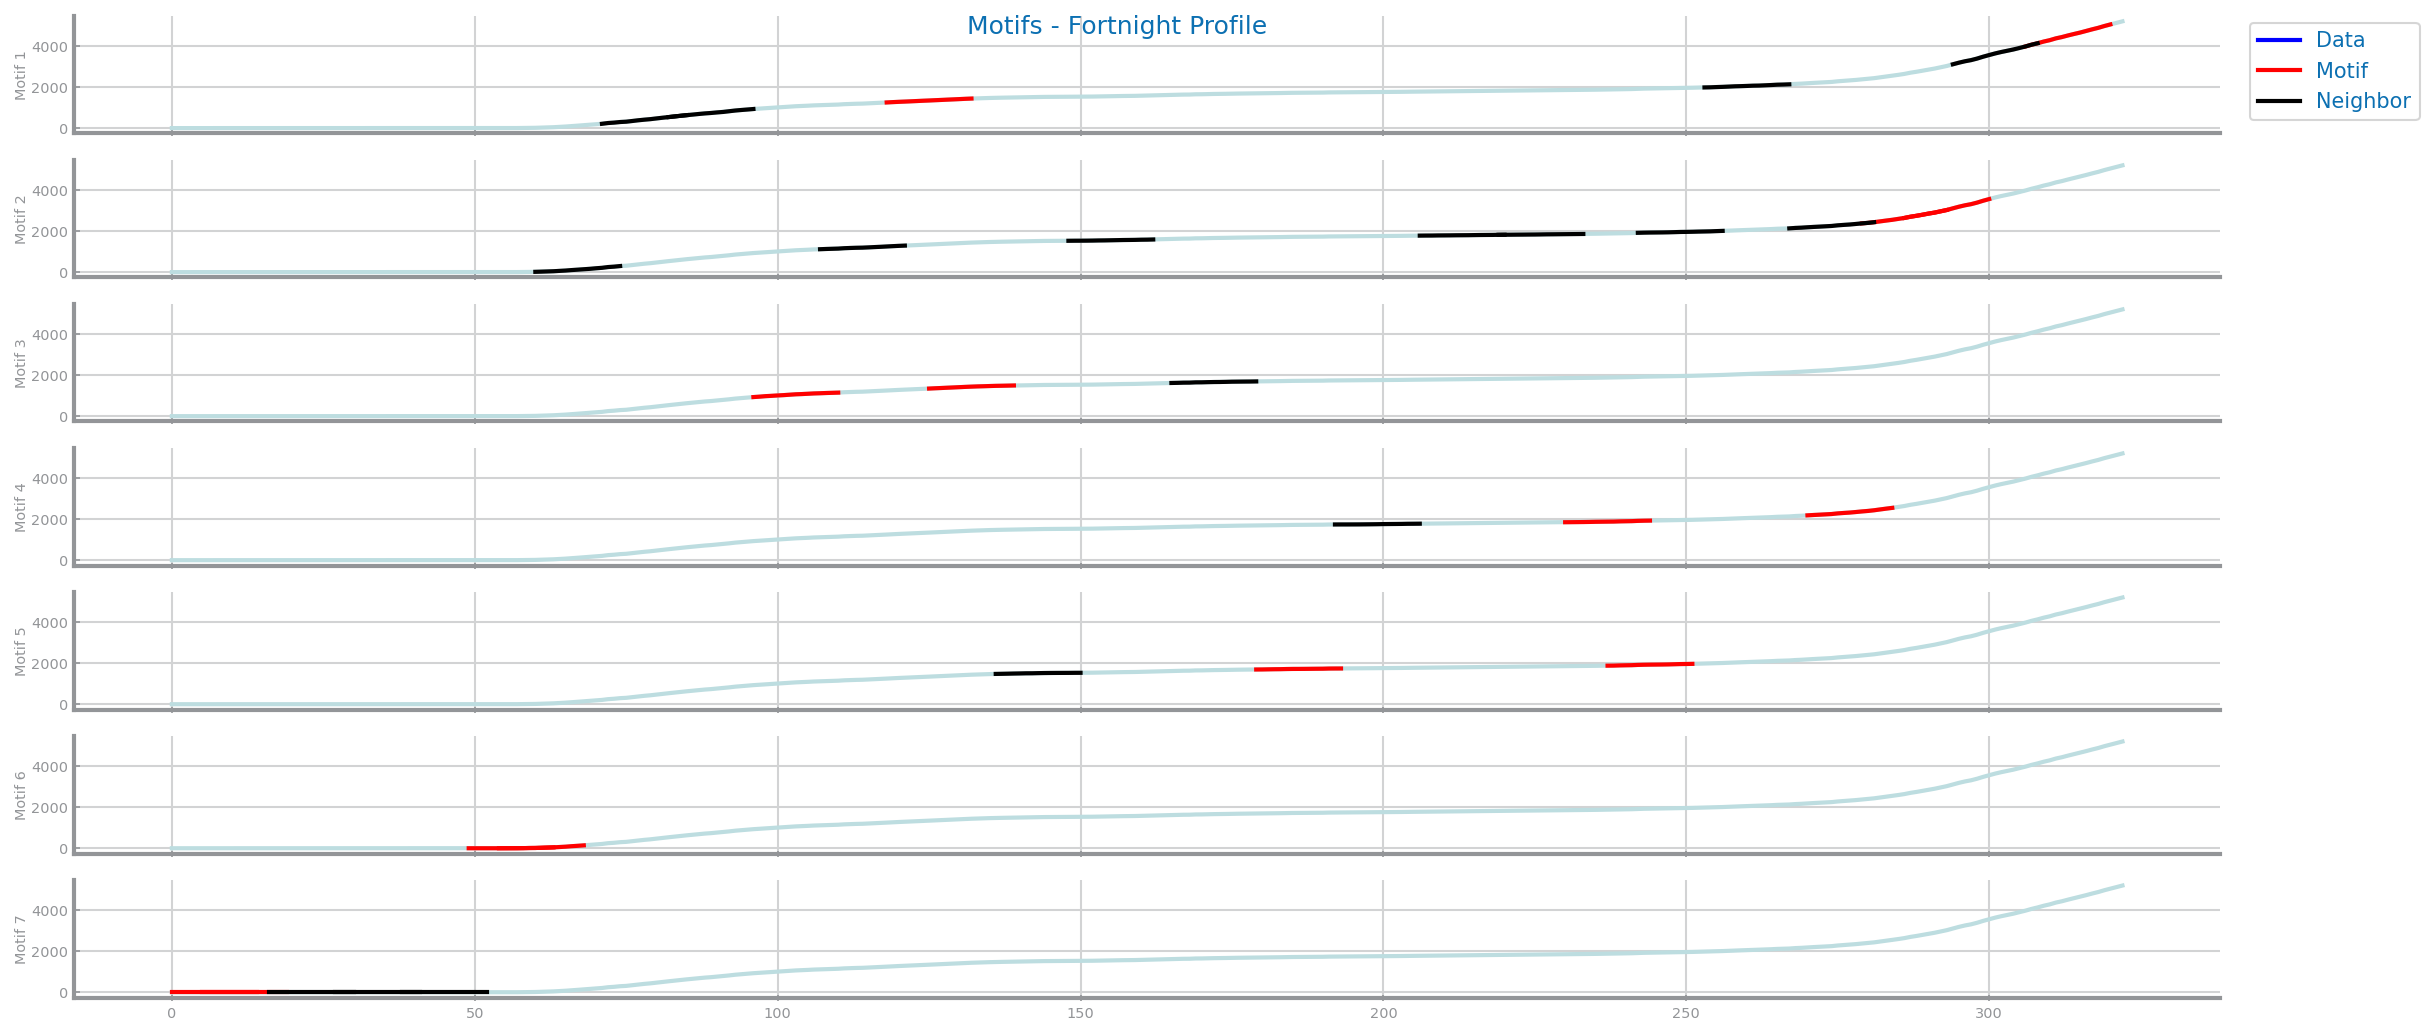

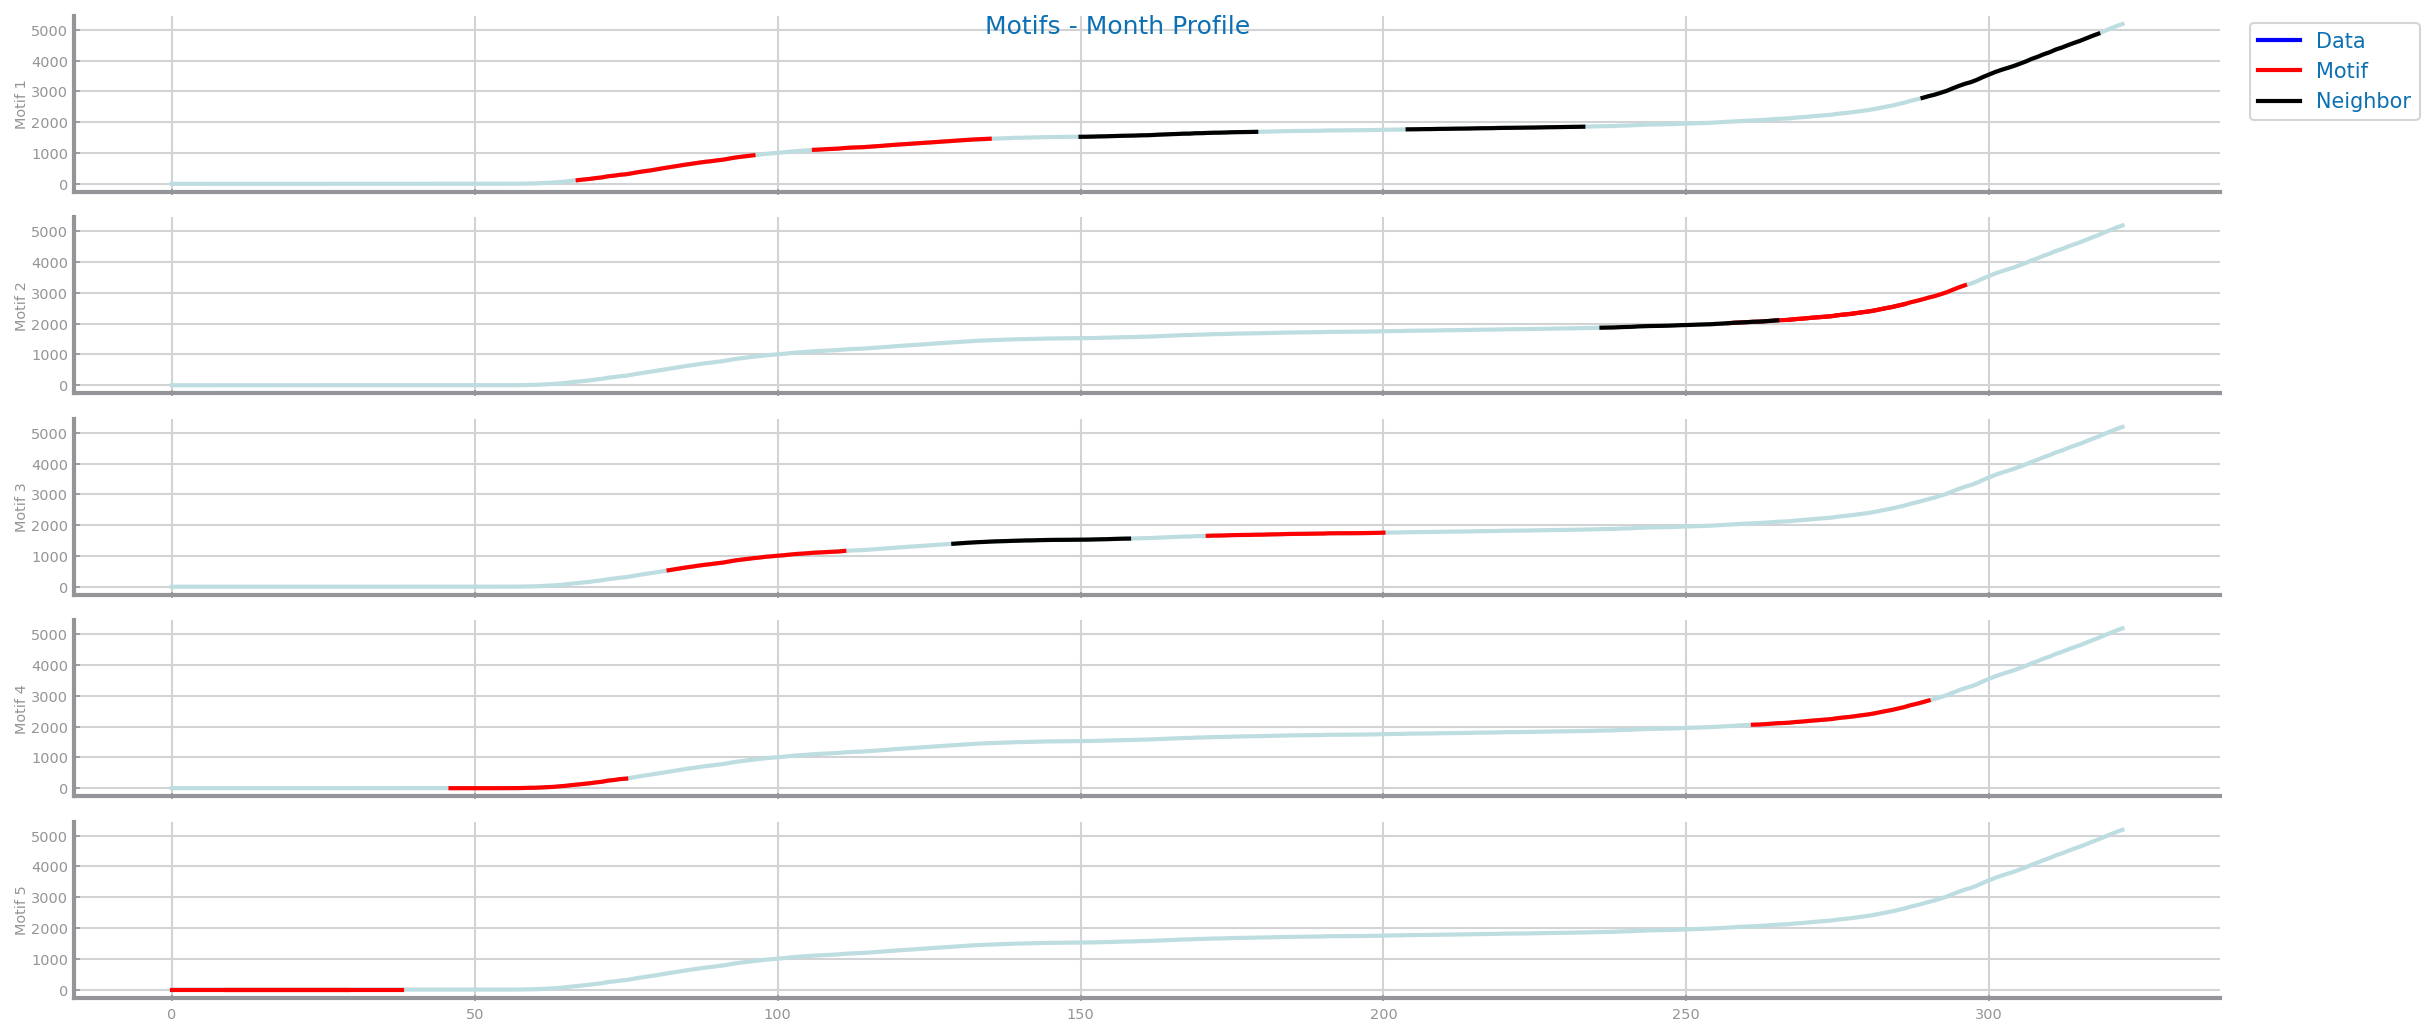

In [35]:
def show_profile(profile, title, type):
    lst_figs = mp.visualize(profile)
    for i in range(len(lst_figs)-1):
        plt.close(lst_figs[i])
    plt.suptitle(type + ' - ' + title)
    plt.show()

for i in range(len(all_windows)):
    title = all_windows[i][0]+' Profile'
    show_profile(all_profiles[title], title, 'Motifs')

### Discords/Anomalies

In [25]:
compute_all_profiles(all_profiles, all_windows, k=10, type='discords')

/home/ds/anaconda3/lib/python3.8/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


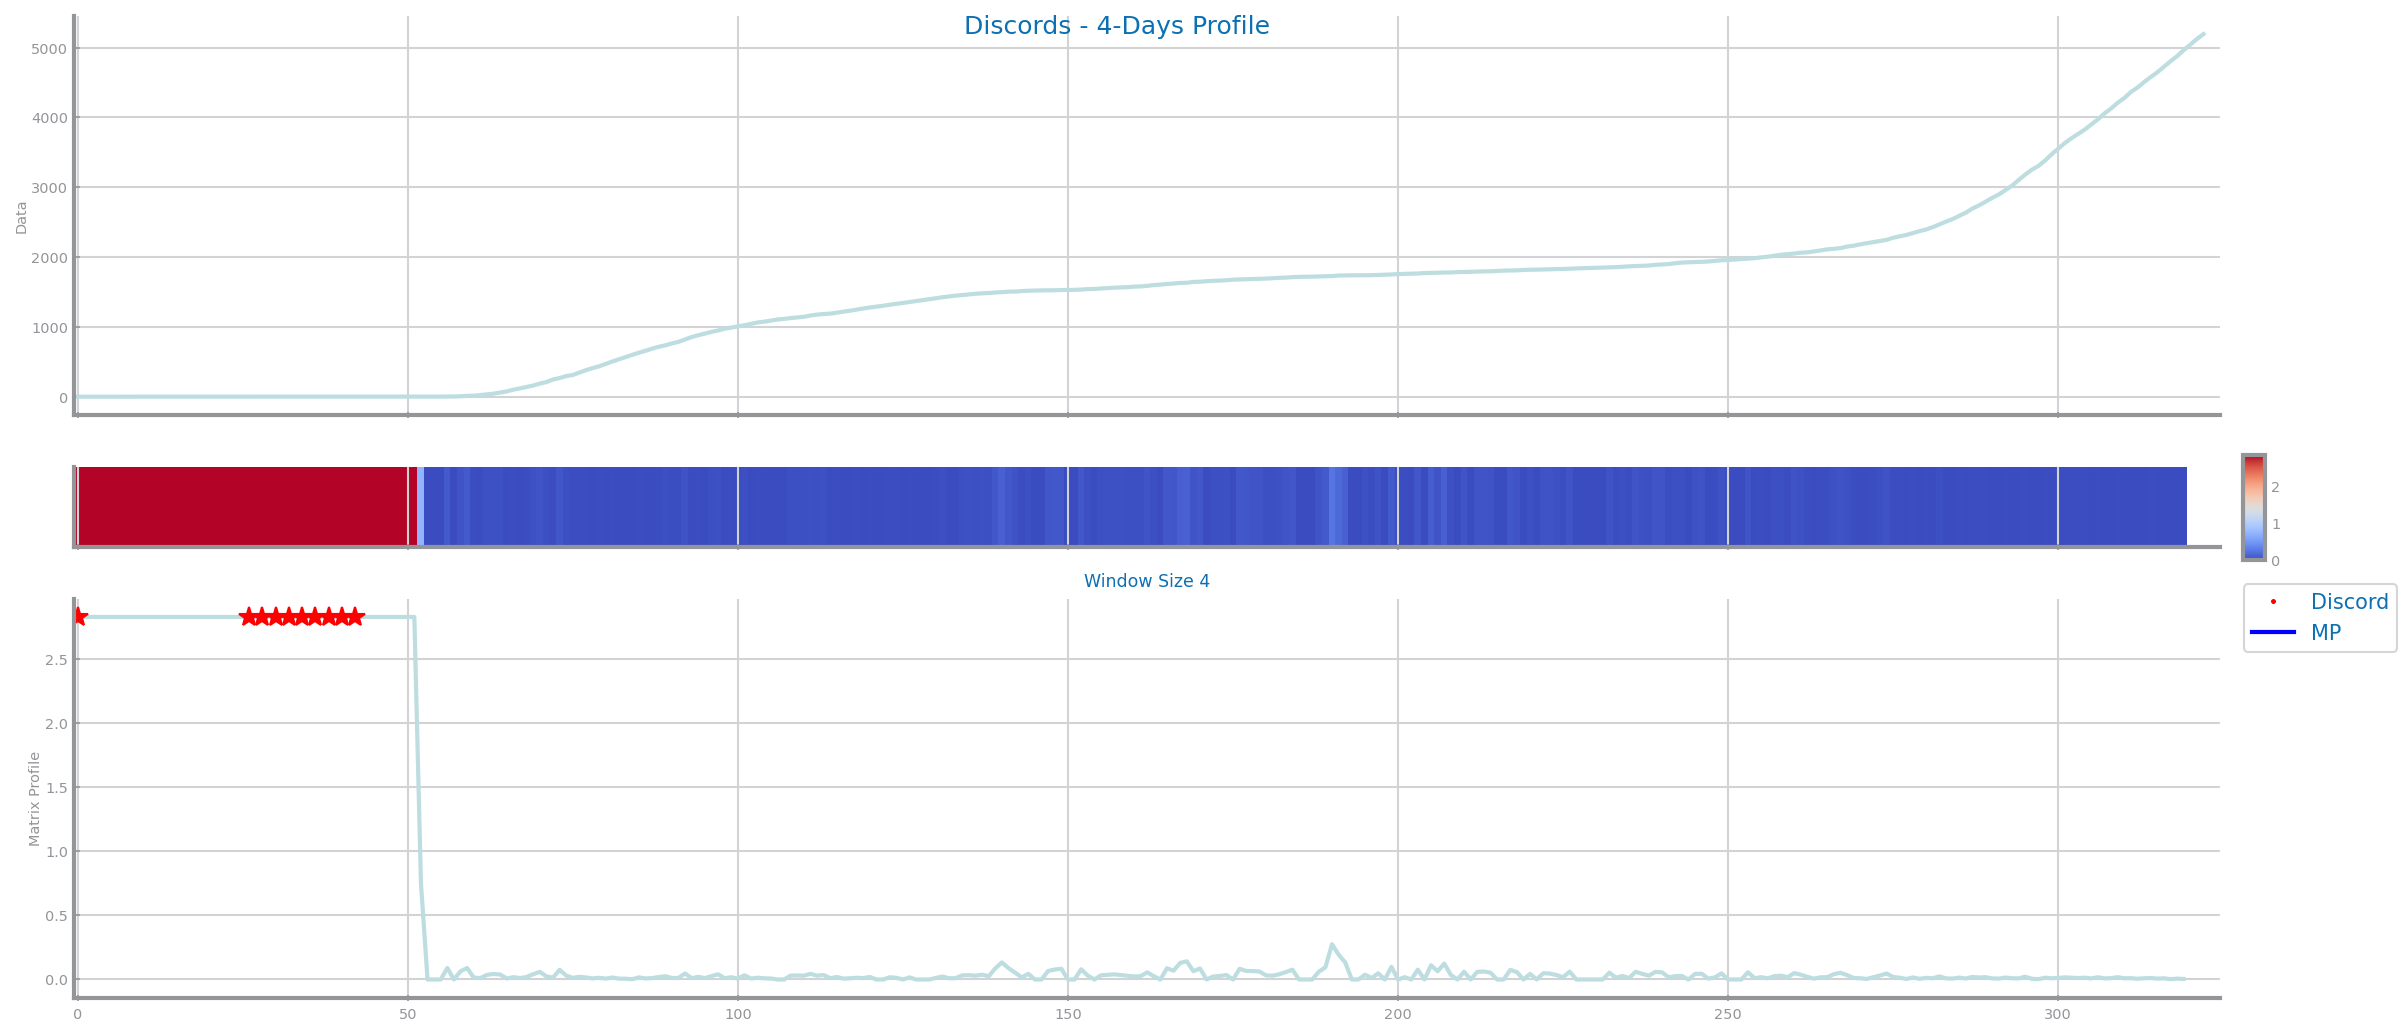

/home/ds/anaconda3/lib/python3.8/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


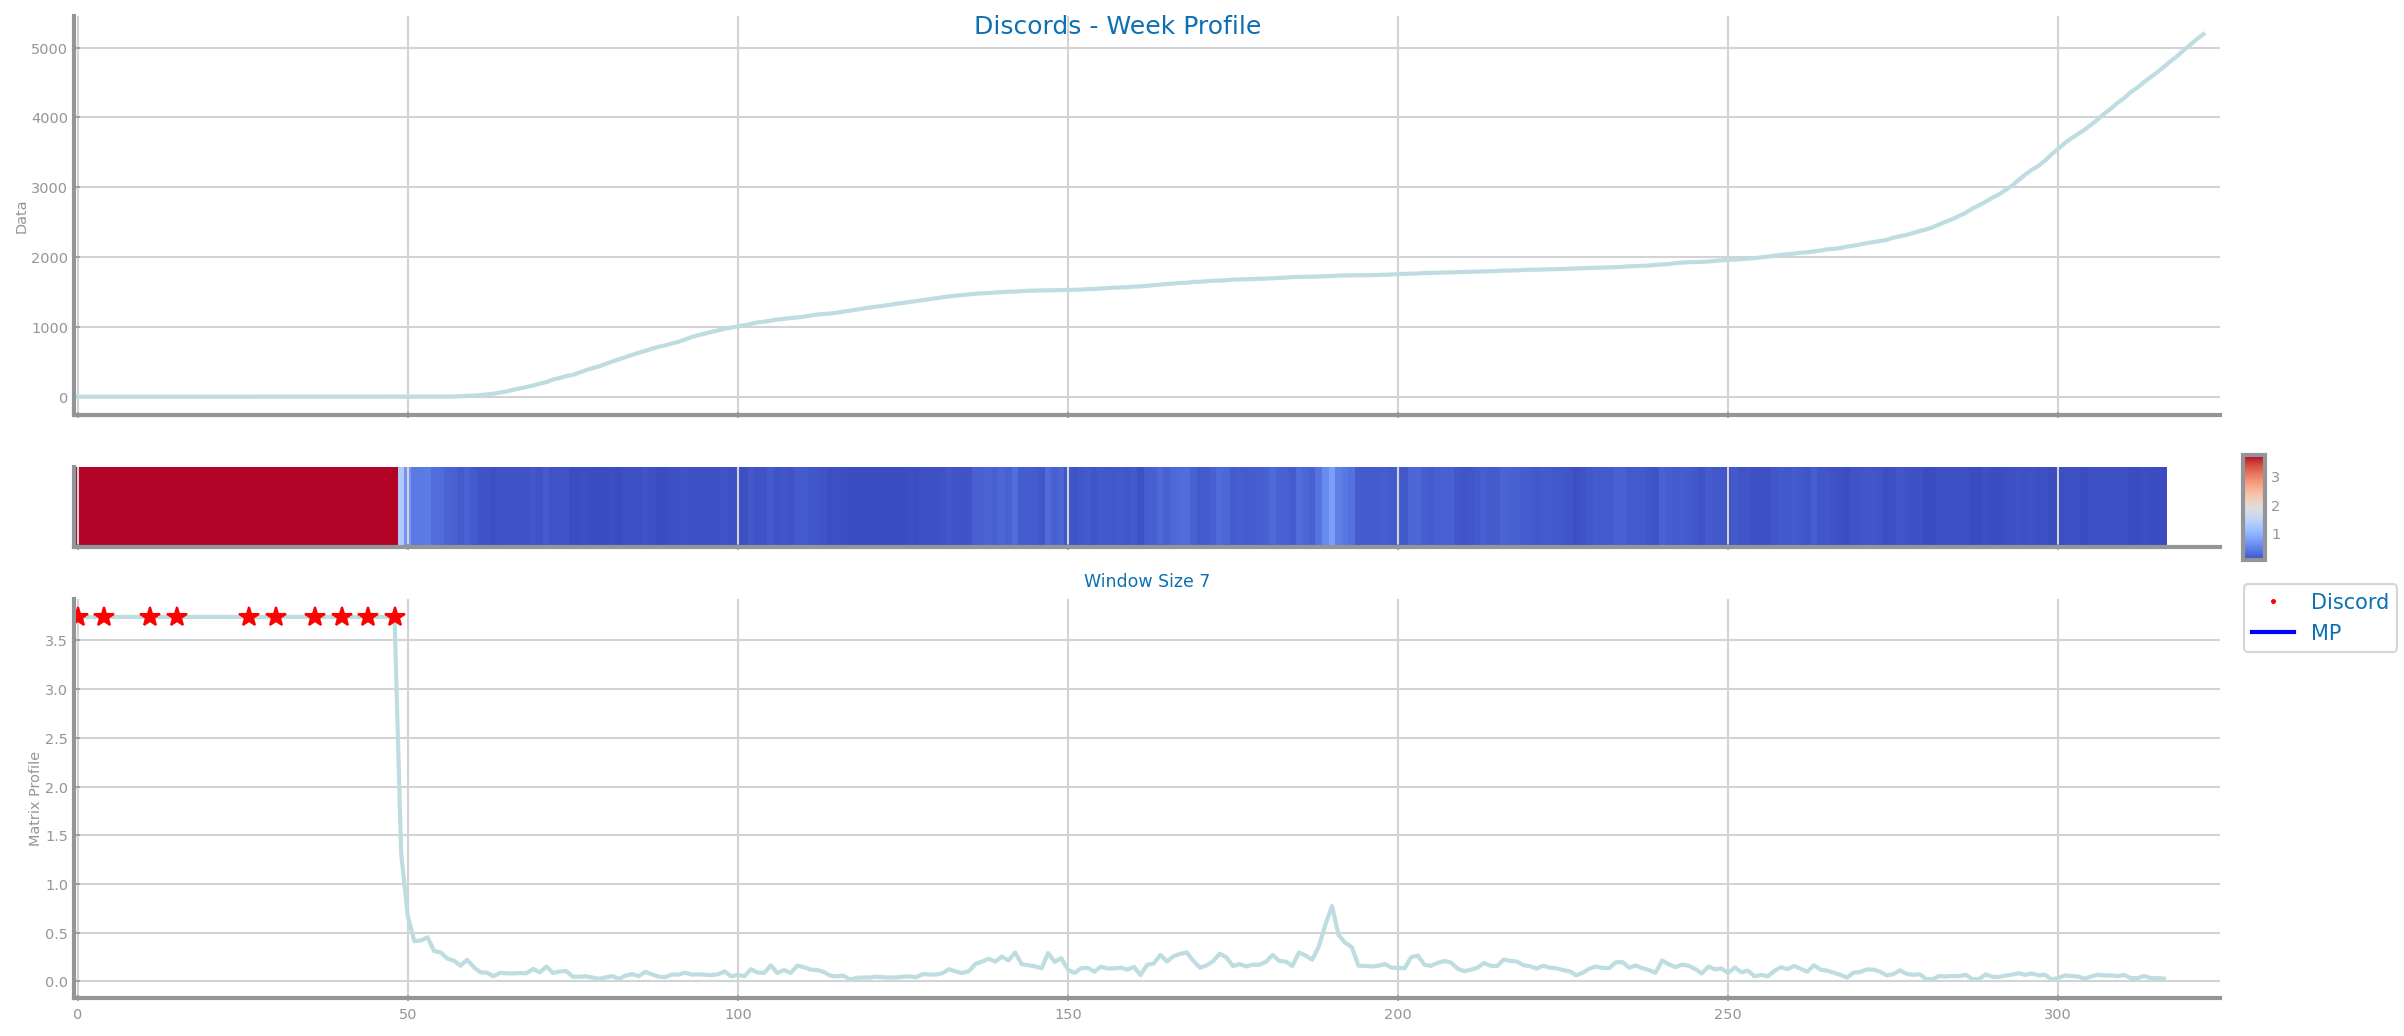

/home/ds/anaconda3/lib/python3.8/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


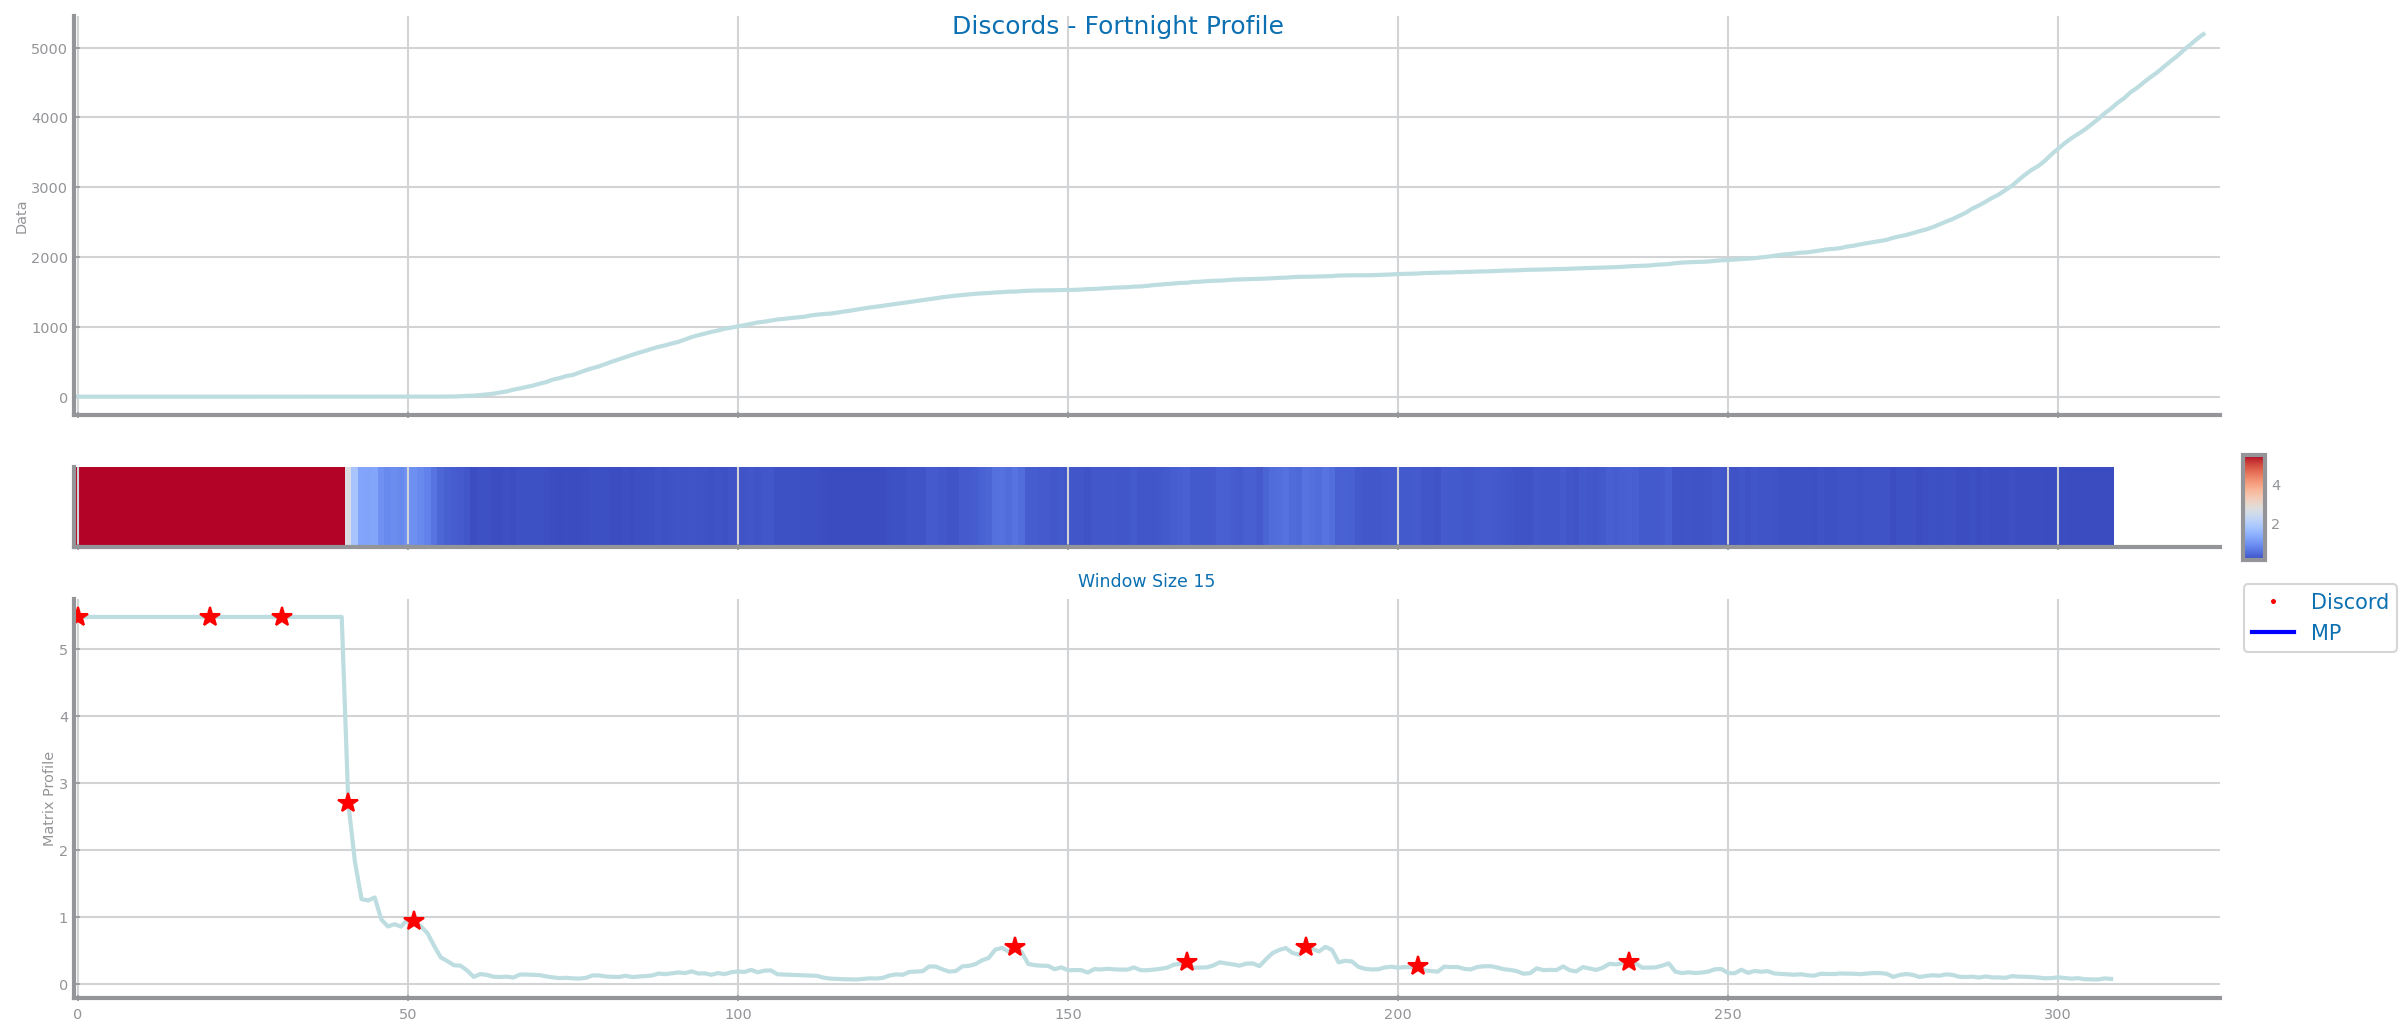

/home/ds/anaconda3/lib/python3.8/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


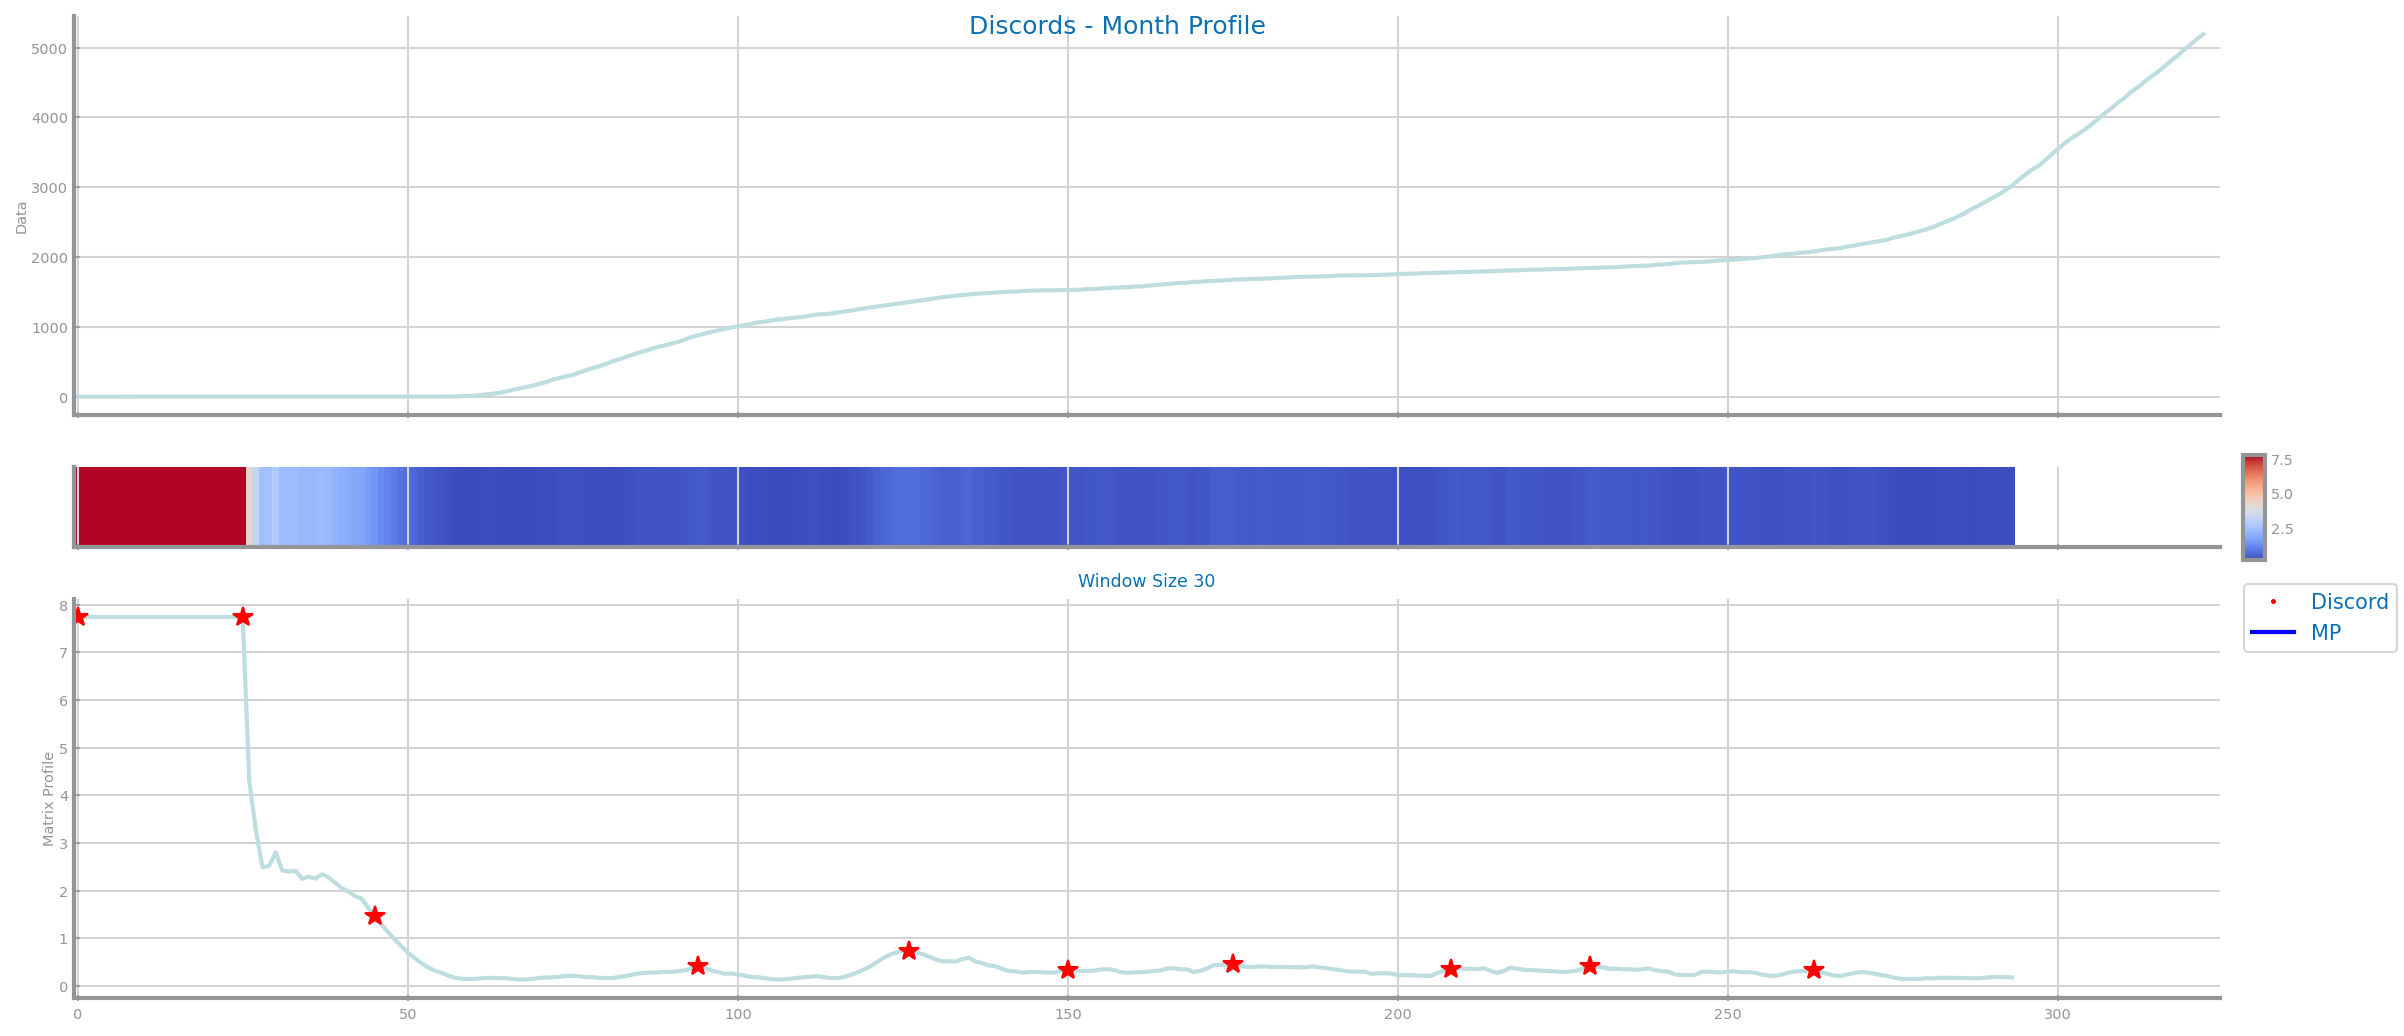

/home/ds/anaconda3/lib/python3.8/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


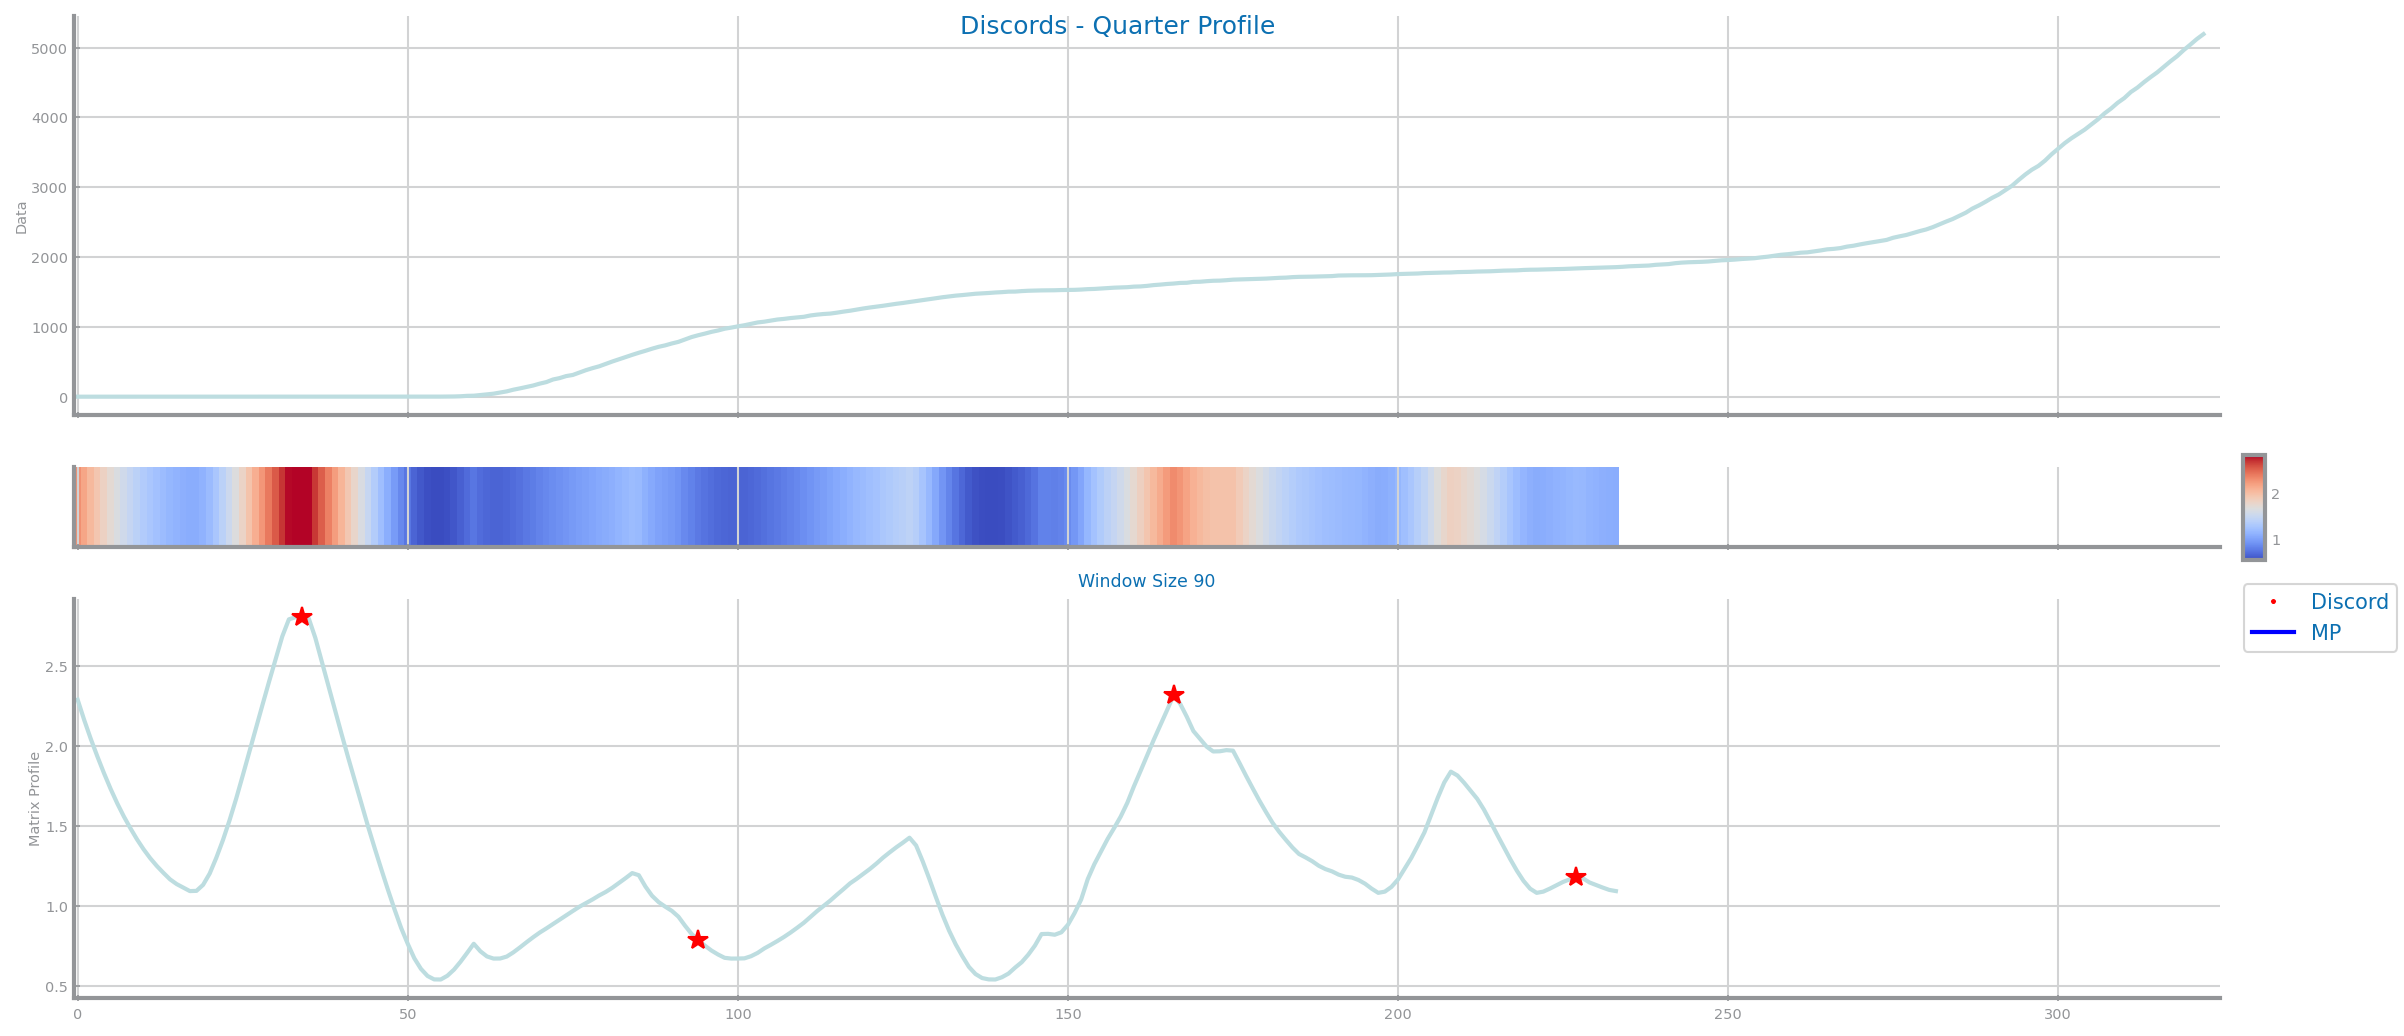

In [27]:
for i in range(len(all_windows)):
    title = all_windows[i][0]+' Profile'
    show_profile(all_profiles[title], title, 'Discords')